In [1]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
import quandl as ql

# Import Custom API Functions
from apidata import (
    timeseries_stock_data,
    qry_balance_sheet,
    qry_income_statement,
    qry_cash_flow_statement
)

%matplotlib inline

In [2]:
# Portfolio Stock Selection
pfolio_assets = ["AAPL", "T", "AMZN", "PG", "BAC", "AA", "FCX", "MSFT", "GM"]

In [3]:
# Initializing DataFrame
portfolio = timeseries_stock_data("GS", verbose=True) \
            .rename(columns={"Close": "GS"})["GS"] \
            .reset_index()


[Quandl] Query API Summary:

- symbol: GS
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

[Preview] Response DataFrame

               Open    High     Low   Close     Volume
Date                                                 
2014-01-02  176.95  178.38  176.36  176.89  1982100.0
2014-01-03  176.35  178.85  176.22  178.15  2147400.0
2014-01-06  179.15  181.13  178.88  179.37  2954000.0
2014-01-07  180.73  180.98  177.52  178.29  2734700.0
2014-01-08  178.50  178.90  177.26  178.44  2208600.0
2014-01-09  179.08  179.08  176.61  177.40  2149500.0
2014-01-10  177.40  178.71  177.00  178.39  2506500.0
2014-01-13  178.30  178.30  175.69  175.88  2823800.0
2014-01-14  176.26  177.50  175.71  176.60  2208800.0
2014-01-15  177.00  179.74  177.00  178.75  3540200.0 

[View] DataFrame Columns -- Data Uniformity
Open      1065
High      1065
Low       1065
Close     1065
Volume    1065
dtype: int64

[View] DataFrame Columns -- Data Types
Open      float

In [4]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets):
    print(f"<Quandl API Call> [{i}] Stock Symbol: {stock}")
    add_stock = timeseries_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [0] Stock Symbol: AAPL
<Quandl API Call> [1] Stock Symbol: T
<Quandl API Call> [2] Stock Symbol: AMZN
<Quandl API Call> [3] Stock Symbol: PG
<Quandl API Call> [4] Stock Symbol: BAC
<Quandl API Call> [5] Stock Symbol: AA
<Quandl API Call> [6] Stock Symbol: FCX
<Quandl API Call> [7] Stock Symbol: MSFT
<Quandl API Call> [8] Stock Symbol: GM

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [5]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,GS,AAPL,T,AMZN,PG,BAC,AA,FCX,MSFT,GM
Date,,,,,,,,,,
2016-11-01,178.06,111.49,36.56,785.41,86.85,16.61,23.00,11.15,59.80,31.48
2016-11-02,176.58,111.59,36.37,765.56,86.74,16.48,22.91,10.62,59.43,31.45
2016-11-03,176.21,109.83,36.63,767.03,86.60,16.48,24.15,10.73,59.21,31.07
2016-11-04,175.92,108.84,36.50,755.05,85.08,16.55,25.20,11.05,58.71,31.16
2016-11-07,181.48,110.41,36.81,784.93,86.56,17.01,25.08,11.29,60.42,32.02
2016-11-08,181.92,111.06,36.99,787.75,87.46,17.00,26.40,12.09,60.47,31.73
2016-11-09,192.63,110.88,37.44,771.88,85.93,17.97,28.72,13.07,60.17,30.96
2016-11-10,200.87,107.79,36.57,742.38,82.96,18.76,29.10,13.80,58.70,32.73
2016-11-11,203.94,108.43,36.51,739.01,83.58,19.02,29.30,13.94,59.02,34.02


In [6]:
# View DataFrame -- Data Completeness
portfolio.count()

GS      350
AAPL    350
T       350
AMZN    350
PG      350
BAC     350
AA      350
FCX     350
MSFT    350
GM      350
dtype: int64

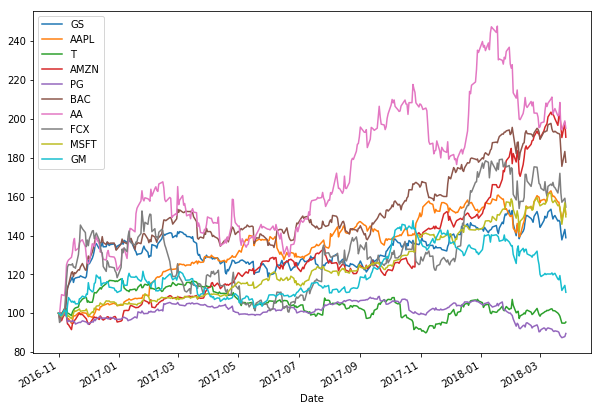

In [7]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = (portfolio/portfolio.iloc[0] * 100).plot(figsize=(10,7))

In [8]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns

,GS,AAPL,T,AMZN,PG,BAC,AA,FCX,MSFT,GM
Date,,,,,,,,,,
2016-11-02,-0.008347,0.000897,-0.005210,-0.025598,-0.001267,-0.007857,-0.003921,-0.048700,-0.006207,-0.000953
2016-11-03,-0.002098,-0.015898,0.007123,0.001918,-0.001615,0.000000,0.052711,0.010305,-0.003709,-0.012156
2016-11-04,-0.001647,-0.009055,-0.003555,-0.015742,-0.017708,0.004239,0.042560,0.029387,-0.008480,0.002892
2016-11-07,0.031116,0.014322,0.008457,0.038811,0.017246,0.027415,-0.004773,0.021487,0.028710,0.027225
2016-11-08,0.002422,0.005870,0.004878,0.003586,0.010344,-0.000588,0.051293,0.068461,0.000827,-0.009098
2016-11-09,0.057204,-0.001622,0.012092,-0.020352,-0.017649,0.055490,0.084230,0.077941,-0.004973,-0.024567
2016-11-10,0.041887,-0.028264,-0.023511,-0.038968,-0.035174,0.043023,0.013144,0.054349,-0.024734,0.055596
2016-11-11,0.015168,0.005920,-0.001642,-0.004550,0.007446,0.013764,0.006849,0.010094,0.005437,0.038656
2016-11-14,0.025369,-0.025405,-0.010463,-0.027353,-0.006964,0.054233,0.010862,-0.001436,-0.015367,-0.021992


In [9]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

GS      0.235186
AAPL    0.295165
T      -0.033286
AMZN    0.462067
PG     -0.078918
BAC     0.411936
AA      0.479186
FCX     0.312172
MSFT    0.288609
GM      0.073262
dtype: float64

In [10]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

,GS,AAPL,T,AMZN,PG,BAC,AA,FCX,MSFT,GM
GS,0.052207,0.013370,0.011448,0.008866,0.001953,0.044434,0.028037,0.034928,0.015207,0.024145
AAPL,0.013370,0.037386,0.006245,0.023199,0.006403,0.012847,0.017096,0.016598,0.021195,0.010451
T,0.011448,0.006245,0.034280,0.002940,0.008091,0.010651,0.004818,0.010321,0.006965,0.010439
AMZN,0.008866,0.023199,0.002940,0.051997,0.004461,0.009877,0.011195,0.009375,0.027532,0.006470
PG,0.001953,0.006403,0.008091,0.004461,0.017160,0.001273,0.003687,0.004468,0.005895,0.004376
BAC,0.044434,0.012847,0.010651,0.009877,0.001273,0.057780,0.034964,0.037139,0.014302,0.026096
AA,0.028037,0.017096,0.004818,0.011195,0.003687,0.034964,0.148910,0.088925,0.014523,0.021144
FCX,0.034928,0.016598,0.010321,0.009375,0.004468,0.037139,0.088925,0.173427,0.016132,0.026629
MSFT,0.015207,0.021195,0.006965,0.027532,0.005895,0.014302,0.014523,0.016132,0.035449,0.011026
GM,0.024145,0.010451,0.010439,0.006470,0.004376,0.026096,0.021144,0.026629,0.011026,0.059421


In [11]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,GS,AAPL,T,AMZN,PG,BAC,AA,FCX,MSFT,GM
GS,1.000000,0.302623,0.270616,0.170169,0.065263,0.809025,0.317982,0.367076,0.353492,0.433501
AAPL,0.302623,1.000000,0.174453,0.526169,0.252802,0.276404,0.229128,0.206138,0.582201,0.221731
T,0.270616,0.174453,1.000000,0.069645,0.333582,0.239322,0.067432,0.133854,0.199809,0.231293
AMZN,0.170169,0.526169,0.069645,1.000000,0.149339,0.180195,0.127228,0.098720,0.641291,0.116406
PG,0.065263,0.252802,0.333582,0.149339,1.000000,0.040421,0.072937,0.081904,0.239034,0.137045
BAC,0.809025,0.276404,0.239322,0.180195,0.040421,1.000000,0.376934,0.371003,0.316014,0.445362
AA,0.317982,0.229128,0.067432,0.127228,0.072937,0.376934,1.000000,0.553358,0.199889,0.224775
FCX,0.367076,0.206138,0.133854,0.098720,0.081904,0.371003,0.553358,1.000000,0.205745,0.262321
MSFT,0.353492,0.582201,0.199809,0.641291,0.239034,0.316014,0.199889,0.205745,1.000000,0.240231
GM,0.433501,0.221731,0.231293,0.116406,0.137045,0.445362,0.224775,0.262321,0.240231,1.000000


In [12]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) + 1)
num_assets

10

In [13]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 1000

for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'AAPL': 0.0358, 'T': 0.0889, 'AMZN': 0.024, 'PG': 0.174, 'BAC': 0.2028, 'AA': 0.0797, 'FCX': 0.0079, 'MSFT': 0.1758, 'GM': 0.2074, 'RTN': 0.2499, 'VOL': 0.1451, 'Sharpe': 1.0464} 


 {'AAPL': 0.0362, 'T': 0.1482, 'AMZN': 0.0172, 'PG': 0.1066, 'BAC': 0.1262, 'AA': 0.1293, 'FCX': 0.157, 'MSFT': 0.1563, 'GM': 0.1019, 'RTN': 0.2992, 'VOL': 0.1671, 'Sharpe': 1.2042} 


 {'AAPL': 0.01, 'T': 0.2286, 'AMZN': 0.0618, 'PG': 0.1577, 'BAC': 0.0198, 'AA': 0.1223, 'FCX': 0.102, 'MSFT': 0.0808, 'GM': 0.0232, 'RTN': 0.2844, 'VOL': 0.1531, 'Sharpe': 1.2178} 


 {'AAPL': 0.1214, 'T': 0.0075, 'AMZN': 0.1153, 'PG': 0.0387, 'BAC': 0.0889, 'AA': 0.1427, 'FCX': 0.1855, 'MSFT': 0.0786, 'GM': 0.0539, 'RTN': 0.2378, 'VOL': 0.1663, 'Sharpe': 0.841} 


 {'AAPL': 0.1099, 'T': 0.165, 'AMZN': 0.0007, 'PG': 0.1542, 'BAC': 0.039, 'AA': 0.0122, 'FCX': 0.0795, 'MSFT': 0.0866, 'GM': 0.1613, 'RTN': 0.2735, 'VOL': 0.1519, 'Sharpe': 1.1551} 


 {'AAPL': 0.1582, 'T': 0.121, 'AMZN': 0.1757, 'PG': 0.0005, 'BAC': 0.1395, 'AA

 {'AAPL': 0.0372, 'T': 0.0775, 'AMZN': 0.0706, 'PG': 0.0152, 'BAC': 0.1154, 'AA': 0.1551, 'FCX': 0.0234, 'MSFT': 0.0181, 'GM': 0.2386, 'RTN': 0.195, 'VOL': 0.1377, 'Sharpe': 0.7045} 


 {'AAPL': 0.0909, 'T': 0.21, 'AMZN': 0.0365, 'PG': 0.0967, 'BAC': 0.0024, 'AA': 0.1366, 'FCX': 0.1371, 'MSFT': 0.1575, 'GM': 0.0329, 'RTN': 0.3145, 'VOL': 0.176, 'Sharpe': 1.2299} 


 {'AAPL': 0.0585, 'T': 0.123, 'AMZN': 0.1371, 'PG': 0.1682, 'BAC': 0.2053, 'AA': 0.1682, 'FCX': 0.0011, 'MSFT': 0.0507, 'GM': 0.0526, 'RTN': 0.2104, 'VOL': 0.1231, 'Sharpe': 0.9133} 


 {'AAPL': 0.0946, 'T': 0.0949, 'AMZN': 0.19, 'PG': 0.0269, 'BAC': 0.0405, 'AA': 0.0605, 'FCX': 0.0767, 'MSFT': 0.1777, 'GM': 0.0311, 'RTN': 0.1945, 'VOL': 0.1639, 'Sharpe': 0.5886} 


 {'AAPL': 0.2045, 'T': 0.0373, 'AMZN': 0.1036, 'PG': 0.059, 'BAC': 0.0198, 'AA': 0.0123, 'FCX': 0.1771, 'MSFT': 0.171, 'GM': 0.0235, 'RTN': 0.2456, 'VOL': 0.1855, 'Sharpe': 0.7953} 


 {'AAPL': 0.0963, 'T': 0.0936, 'AMZN': 0.1269, 'PG': 0.0692, 'BAC': 0.0772, 'AA


 {'AAPL': 0.1465, 'T': 0.1314, 'AMZN': 0.0808, 'PG': 0.0431, 'BAC': 0.1, 'AA': 0.1234, 'FCX': 0.0776, 'MSFT': 0.137, 'GM': 0.0439, 'RTN': 0.2345, 'VOL': 0.1562, 'Sharpe': 0.8743} 


 {'AAPL': 0.1043, 'T': 0.079, 'AMZN': 0.0926, 'PG': 0.0858, 'BAC': 0.0475, 'AA': 0.0126, 'FCX': 0.194, 'MSFT': 0.018, 'GM': 0.1532, 'RTN': 0.2442, 'VOL': 0.1531, 'Sharpe': 0.9547} 


 {'AAPL': 0.0887, 'T': 0.0173, 'AMZN': 0.0917, 'PG': 0.0143, 'BAC': 0.1097, 'AA': 0.1806, 'FCX': 0.115, 'MSFT': 0.1517, 'GM': 0.0641, 'RTN': 0.2285, 'VOL': 0.169, 'Sharpe': 0.7719} 


 {'AAPL': 0.0208, 'T': 0.2133, 'AMZN': 0.0311, 'PG': 0.0105, 'BAC': 0.0227, 'AA': 0.0738, 'FCX': 0.1495, 'MSFT': 0.164, 'GM': 0.0785, 'RTN': 0.263, 'VOL': 0.1782, 'Sharpe': 0.9261} 


 {'AAPL': 0.1825, 'T': 0.0209, 'AMZN': 0.0869, 'PG': 0.1556, 'BAC': 0.0894, 'AA': 0.1264, 'FCX': 0.1987, 'MSFT': 0.0203, 'GM': 0.0142, 'RTN': 0.2765, 'VOL': 0.1583, 'Sharpe': 1.1274} 


 {'AAPL': 0.0959, 'T': 0.2833, 'AMZN': 0.1119, 'PG': 0.0481, 'BAC': 0.0652, 'AA'

 {'AAPL': 0.2122, 'T': 0.1998, 'AMZN': 0.1399, 'PG': 0.0454, 'BAC': 0.093, 'AA': 0.0548, 'FCX': 0.1165, 'MSFT': 0.018, 'GM': 0.0504, 'RTN': 0.2216, 'VOL': 0.1397, 'Sharpe': 0.8846} 


 {'AAPL': 0.0816, 'T': 0.0403, 'AMZN': 0.1666, 'PG': 0.1182, 'BAC': 0.1548, 'AA': 0.1039, 'FCX': 0.1288, 'MSFT': 0.1372, 'GM': 0.0011, 'RTN': 0.2205, 'VOL': 0.1513, 'Sharpe': 0.8102} 


 {'AAPL': 0.0267, 'T': 0.0895, 'AMZN': 0.111, 'PG': 0.0703, 'BAC': 0.0943, 'AA': 0.1572, 'FCX': 0.0714, 'MSFT': 0.0553, 'GM': 0.305, 'RTN': 0.2598, 'VOL': 0.1387, 'Sharpe': 1.1662} 


 {'AAPL': 0.1159, 'T': 0.1229, 'AMZN': 0.1031, 'PG': 0.0997, 'BAC': 0.0556, 'AA': 0.117, 'FCX': 0.1131, 'MSFT': 0.1365, 'GM': 0.1029, 'RTN': 0.2789, 'VOL': 0.1587, 'Sharpe': 1.1395} 


 {'AAPL': 0.1218, 'T': 0.0203, 'AMZN': 0.1587, 'PG': 0.0942, 'BAC': 0.0269, 'AA': 0.0966, 'FCX': 0.1386, 'MSFT': 0.1486, 'GM': 0.1376, 'RTN': 0.2672, 'VOL': 0.1656, 'Sharpe': 1.0221} 


 {'AAPL': 0.0613, 'T': 0.1603, 'AMZN': 0.0927, 'PG': 0.1392, 'BAC': 0.0669,


 {'AAPL': 0.088, 'T': 0.1428, 'AMZN': 0.1177, 'PG': 0.122, 'BAC': 0.0558, 'AA': 0.1932, 'FCX': 0.0016, 'MSFT': 0.2308, 'GM': 0.0035, 'RTN': 0.2676, 'VOL': 0.1677, 'Sharpe': 1.0116} 


 {'AAPL': 0.1183, 'T': 0.0004, 'AMZN': 0.009, 'PG': 0.0288, 'BAC': 0.1808, 'AA': 0.1862, 'FCX': 0.1915, 'MSFT': 0.0159, 'GM': 0.1751, 'RTN': 0.2575, 'VOL': 0.1554, 'Sharpe': 1.0268} 


 {'AAPL': 0.1602, 'T': 0.0672, 'AMZN': 0.0654, 'PG': 0.1926, 'BAC': 0.1897, 'AA': 0.1345, 'FCX': 0.1392, 'MSFT': 0.0041, 'GM': 0.0283, 'RTN': 0.2622, 'VOL': 0.1381, 'Sharpe': 1.1896} 


 {'AAPL': 0.0241, 'T': 0.1822, 'AMZN': 0.0828, 'PG': 0.0096, 'BAC': 0.0892, 'AA': 0.1673, 'FCX': 0.0439, 'MSFT': 0.1319, 'GM': 0.0877, 'RTN': 0.2239, 'VOL': 0.1512, 'Sharpe': 0.8326} 


 {'AAPL': 0.0374, 'T': 0.0571, 'AMZN': 0.1575, 'PG': 0.1425, 'BAC': 0.0713, 'AA': 0.0993, 'FCX': 0.1378, 'MSFT': 0.1081, 'GM': 0.129, 'RTN': 0.2629, 'VOL': 0.1501, 'Sharpe': 1.0983} 


 {'AAPL': 0.0806, 'T': 0.0381, 'AMZN': 0.0528, 'PG': 0.203, 'BAC': 0.197,


 {'AAPL': 0.0537, 'T': 0.2145, 'AMZN': 0.1629, 'PG': 0.2032, 'BAC': 0.0858, 'AA': 0.0025, 'FCX': 0.077, 'MSFT': 0.021, 'GM': 0.0766, 'RTN': 0.2318, 'VOL': 0.1308, 'Sharpe': 1.0222} 


 {'AAPL': 0.1197, 'T': 0.007, 'AMZN': 0.0731, 'PG': 0.1689, 'BAC': 0.1742, 'AA': 0.1298, 'FCX': 0.0548, 'MSFT': 0.1732, 'GM': 0.0341, 'RTN': 0.2405, 'VOL': 0.1525, 'Sharpe': 0.9346} 


 {'AAPL': 0.1041, 'T': 0.0824, 'AMZN': 0.1318, 'PG': 0.1002, 'BAC': 0.0645, 'AA': 0.0921, 'FCX': 0.0578, 'MSFT': 0.1322, 'GM': 0.1075, 'RTN': 0.2329, 'VOL': 0.1482, 'Sharpe': 0.9101} 


 {'AAPL': 0.0229, 'T': 0.0135, 'AMZN': 0.1339, 'PG': 0.0052, 'BAC': 0.1701, 'AA': 0.1733, 'FCX': 0.1372, 'MSFT': 0.0725, 'GM': 0.1041, 'RTN': 0.1959, 'VOL': 0.1477, 'Sharpe': 0.663} 


 {'AAPL': 0.1277, 'T': 0.0536, 'AMZN': 0.1289, 'PG': 0.0417, 'BAC': 0.125, 'AA': 0.1201, 'FCX': 0.0858, 'MSFT': 0.0676, 'GM': 0.1088, 'RTN': 0.2044, 'VOL': 0.1414, 'Sharpe': 0.7526} 


 {'AAPL': 0.0486, 'T': 0.1401, 'AMZN': 0.1189, 'PG': 0.0493, 'BAC': 0.1629

 {'AAPL': 0.0885, 'T': 0.0294, 'AMZN': 0.0865, 'PG': 0.158, 'BAC': 0.1579, 'AA': 0.131, 'FCX': 0.048, 'MSFT': 0.1074, 'GM': 0.1495, 'RTN': 0.244, 'VOL': 0.1383, 'Sharpe': 1.0559} 


 {'AAPL': 0.0745, 'T': 0.1508, 'AMZN': 0.118, 'PG': 0.0136, 'BAC': 0.0915, 'AA': 0.0917, 'FCX': 0.1204, 'MSFT': 0.1128, 'GM': 0.0944, 'RTN': 0.2248, 'VOL': 0.1521, 'Sharpe': 0.8338} 


 {'AAPL': 0.0409, 'T': 0.1667, 'AMZN': 0.1225, 'PG': 0.0025, 'BAC': 0.0655, 'AA': 0.1521, 'FCX': 0.066, 'MSFT': 0.0328, 'GM': 0.1389, 'RTN': 0.2108, 'VOL': 0.141, 'Sharpe': 0.8006} 


 {'AAPL': 0.2885, 'T': 0.0848, 'AMZN': 0.0732, 'PG': 0.1821, 'BAC': 0.1119, 'AA': 0.0186, 'FCX': 0.0394, 'MSFT': 0.0508, 'GM': 0.0249, 'RTN': 0.2246, 'VOL': 0.1395, 'Sharpe': 0.9073} 


 {'AAPL': 0.1963, 'T': 0.0434, 'AMZN': 0.0039, 'PG': 0.1006, 'BAC': 0.1107, 'AA': 0.0502, 'FCX': 0.2434, 'MSFT': 0.0236, 'GM': 0.077, 'RTN': 0.2745, 'VOL': 0.167, 'Sharpe': 1.0568} 


 {'AAPL': 0.0351, 'T': 0.1106, 'AMZN': 0.0305, 'PG': 0.0919, 'BAC': 0.1518, 'AA

 {'AAPL': 0.0275, 'T': 0.0027, 'AMZN': 0.1328, 'PG': 0.0872, 'BAC': 0.0057, 'AA': 0.1923, 'FCX': 0.092, 'MSFT': 0.156, 'GM': 0.1418, 'RTN': 0.2675, 'VOL': 0.1671, 'Sharpe': 1.0141} 


 {'AAPL': 0.1866, 'T': 0.0332, 'AMZN': 0.061, 'PG': 0.138, 'BAC': 0.1585, 'AA': 0.0914, 'FCX': 0.0901, 'MSFT': 0.1402, 'GM': 0.0802, 'RTN': 0.2522, 'VOL': 0.1526, 'Sharpe': 1.0104} 


 {'AAPL': 0.1093, 'T': 0.2671, 'AMZN': 0.2308, 'PG': 0.0003, 'BAC': 0.0218, 'AA': 0.0226, 'FCX': 0.0401, 'MSFT': 0.1888, 'GM': 0.0164, 'RTN': 0.195, 'VOL': 0.1578, 'Sharpe': 0.6144} 


 {'AAPL': 0.1432, 'T': 0.0653, 'AMZN': 0.162, 'PG': 0.0895, 'BAC': 0.042, 'AA': 0.1124, 'FCX': 0.0415, 'MSFT': 0.0981, 'GM': 0.1135, 'RTN': 0.2249, 'VOL': 0.1454, 'Sharpe': 0.8724} 


 {'AAPL': 0.0721, 'T': 0.097, 'AMZN': 0.0487, 'PG': 0.1492, 'BAC': 0.1417, 'AA': 0.0263, 'FCX': 0.1564, 'MSFT': 0.0336, 'GM': 0.0814, 'RTN': 0.2357, 'VOL': 0.1425, 'Sharpe': 0.9666} 


 {'AAPL': 0.1292, 'T': 0.0582, 'AMZN': 0.1485, 'PG': 0.0214, 'BAC': 0.1649, 'A

In [14]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,AA,AAPL,AMZN,BAC,FCX,GM,MSFT,PG,RTN,Sharpe,T,VOL
0,0.0797,0.0358,0.0240,0.2028,0.0079,0.2074,0.1758,0.1740,0.2499,1.0464,0.0889,0.1451
1,0.1293,0.0362,0.0172,0.1262,0.1570,0.1019,0.1563,0.1066,0.2992,1.2042,0.1482,0.1671
2,0.1223,0.0100,0.0618,0.0198,0.1020,0.0232,0.0808,0.1577,0.2844,1.2178,0.2286,0.1531
3,0.1427,0.1214,0.1153,0.0889,0.1855,0.0539,0.0786,0.0387,0.2378,0.8410,0.0075,0.1663
4,0.0122,0.1099,0.0007,0.0390,0.0795,0.1613,0.0866,0.1542,0.2735,1.1551,0.1650,0.1519


In [15]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,1000.000000,1000.000000,1000.000000
mean,0.963669,0.244263,0.150898
std,0.200485,0.035951,0.013631
min,0.048400,0.104600,0.118400
25%,0.839675,0.220775,0.141775
50%,0.971100,0.244250,0.150000
75%,1.099525,0.269350,0.159700
max,1.523900,0.349800,0.207500


In [16]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [17]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

,,,AA,AAPL,AMZN,BAC,FCX,GM,MSFT,PG,T
Sharpe,RTN,VOL,,,,,,,,,
1.5239,0.3498,0.1653,0.1860,0.0151,0.0089,0.0006,0.1264,0.1357,0.1001,0.1614,0.2025
1.5043,0.3403,0.1611,0.2011,0.0419,0.0277,0.0324,0.0832,0.0747,0.1241,0.1951,0.2012
1.4860,0.3184,0.1483,0.1808,0.0781,0.0547,0.0171,0.0981,0.1872,0.0061,0.1616,0.1590
1.4581,0.3214,0.1532,0.1292,0.0454,0.0536,0.0676,0.1720,0.0724,0.0388,0.2204,0.1472
1.4543,0.3363,0.1638,0.0808,0.1434,0.0217,0.0150,0.1545,0.1772,0.0804,0.1699,0.1392
1.4494,0.3228,0.1551,0.1995,0.1291,0.0540,0.0474,0.1189,0.2025,0.0419,0.1673,0.0321
1.4401,0.3132,0.1495,0.1528,0.1194,0.0143,0.0549,0.1170,0.1924,0.0066,0.1264,0.1763
1.4288,0.3485,0.1753,0.3140,0.2449,0.0000,0.0153,0.1035,0.0275,0.0302,0.1423,0.0952
1.4069,0.3308,0.1655,0.1121,0.1158,0.0085,0.0670,0.1977,0.1546,0.0667,0.1335,0.1377


In [18]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,AA,AAPL,AMZN,BAC,FCX,GM,MSFT,PG,T
Sharpe,RTN,VOL,,,,,,,,,
0.4098,0.1469,0.1193,0.0481,0.0707,0.1782,0.2249,0.0261,0.0186,0.0361,0.1595,0.0624
0.4045,0.1567,0.1452,0.0602,0.1268,0.2230,0.1873,0.0440,0.1035,0.1744,0.0240,0.0165
0.4018,0.1502,0.1300,0.0733,0.1355,0.1490,0.1611,0.0115,0.1317,0.0436,0.0428,0.0473
0.3903,0.1454,0.1215,0.0473,0.1771,0.1028,0.2429,0.0266,0.0890,0.0129,0.0167,0.1617
0.3845,0.1486,0.1317,0.0194,0.2115,0.0708,0.2417,0.0816,0.0672,0.0161,0.0584,0.0212
0.3676,0.1478,0.1355,0.0453,0.0368,0.1549,0.2607,0.0008,0.0657,0.1871,0.0965,0.0574
0.3425,0.1410,0.1256,0.0829,0.0415,0.2083,0.1729,0.0170,0.0238,0.0562,0.0782,0.1153
0.3347,0.1442,0.1380,0.0055,0.1746,0.0375,0.2591,0.0294,0.0955,0.1252,0.0153,0.0715
0.0909,0.1088,0.1184,0.0033,0.0024,0.2035,0.2601,0.0768,0.1671,0.0153,0.0083,0.0955


In [19]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

(0.05, 0.4)

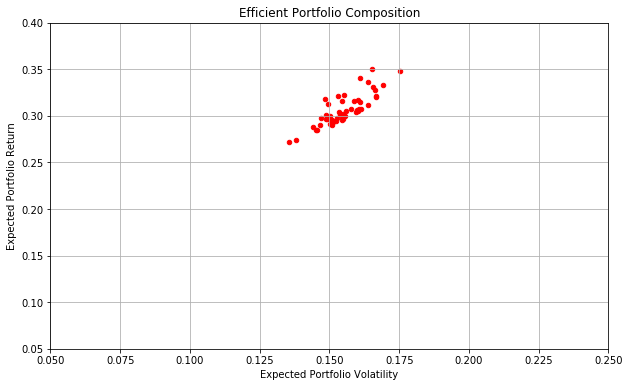

In [20]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(.05, .4)


(0.05, 0.4)

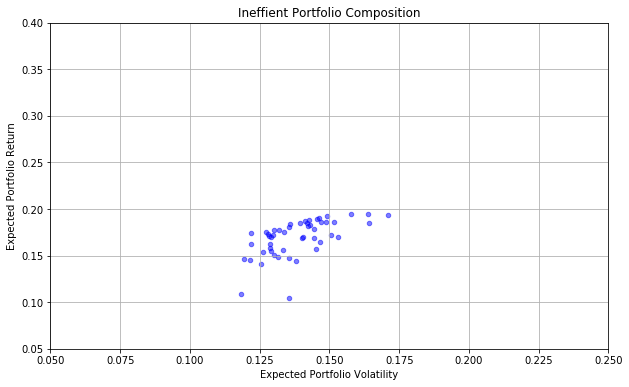

In [21]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(.05, .4)

(0.05, 0.4)

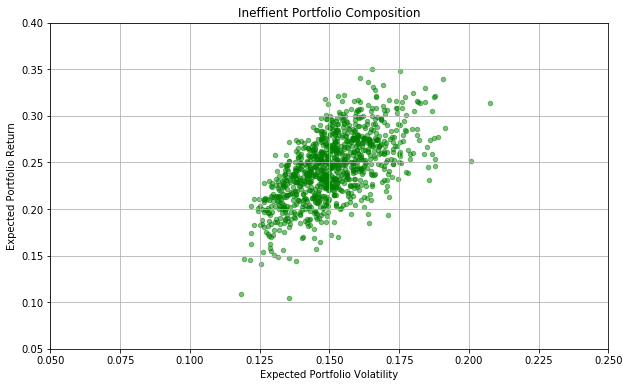

In [22]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(.05, .4)